<a href="https://colab.research.google.com/github/kirenrajb/Dataset/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 1

In [ ]:
import pandas as pd
popList = [56286961, 5463300, 3152879, 1893667]

print( popList )
print()

# LISTS AND SERIES
# A Series in Pandas is very like a list. A list holds an ordered set of objects. A Series holds a labelled ordered set of objects. The labels may just be row numbers, or other 
# variables including strings. A Series is more similar to a dictionary than a list. If you do not provide an index for a series then Pandas creates a numeric integer index for 
# each item. 

# pandas Series is one dimensional indexed (labelled) array capable of holding any data type. Because of the labels it is more similar to a dictionary than a list.
sr = pd.Series(["England", "Scotland", "Wales", "Northern Ireland"])
print(sr)
print()

# DATAFRAME
# Dataframe is 2D labelled array capable of holding any data type. To create a Dataframe, new columns can be added by giving the column name and a series or list. NB if using a 
# series the index must match
# the Dataframe index for like rows to be matched to like rows. As shown here each column is given a name when it is created rows are auto-indexed by sequential integers. 
df = pd.DataFrame()
df["country"] = sr
pop = pd.Series([56286961, 5463300, 3152879, 1893667])
df["pop"] = pop

print(df)
print()

# ACCESS ELEMENTS FROM A DATAFRAME
# The iloc method allows a range of indexing semantics to be adopted to access slices of a Dataframe. 
# The slice syntax in the first example [0:1] says start at row 0 and select all rows up to but not including row 1.
# In the second example the same slice syntax is used to select a single column.
# You can select all rows and columns, or just a contiguous subset of them using this approach. 

# Access a row(s)by integer index slide (range)
print(df.iloc[0:1])
print()

# Access a column(s) by integer index location.
print(df.iloc[:,0:1])
print(df.iloc[:,:])
print()

# ACCESS SINGLE ELEMENTS, AND CONDITIONAL ROWS FROM A DATAFRAME
# The slice notation will return a Dataframe or a Series.
# If you directly index a single element you will just get back the single object stored there.
# The conditional selection syntax allows rows to be selected based on a column value
# This is one useful approach to filtering a Dataframe based on its contents.

# Access a single element as an indexed dataframe or as a single value. Essentially [row,column]
print(df.iloc[0:1,1:2])
print(df.iloc[0,1])
print()

# Conditional access to a set of rows based on column values.  
print(df [df["pop"] < 50000000] )
print()

# SORTING THE ROWS IN A DATAFRAME BY A COLUMN VALUE, REINDEXING
# Sorting the rows of a Dataframe is also a common operation. Note that it is usual to do this with inplace=True unless you need to create a separate new Dataframe. 
# Also note that the index is sorted as if it is a column of data so if you need an index in the sorted order, which is common, you need to reset_index the Dataframe as shown. 

# Commonly want to sort data frames by specific column values.
df.sort_values(by = "pop", ascending = True, inplace = True)
print(df)
print()
# Note we have changed the index.. this means we will not index by the newly sorted order, fix by reseting the index 
df.reset_index(drop = True, inplace = True)
print(df)
print()

# SORTING THE ROWS IN A DATAFRAME BY A LEXICAL VALUE
# Pandas will sort the objects using a method based on their type. 
# For strings this means a lexical order, this will almost never be a numeric order even if the strings represent numbers. 
# Watch output for alphanumeric labels as they often are not sorted how you expect.
# This problem can happen if numbers are read as strings from a data file.
# Don't forget to reset the index when needed.

# Alpha-numeric sorting, will always be sorted lexically not numerically.  
# This will almost never sorting numbers in numerical order.
df.sort_values(by = "country", ascending = True, inplace = True)
print(df)
print()
df.reset_index(drop = True, inplace = True)
print(df)

[56286961, 5463300, 3152879, 1893667]

0             England
1            Scotland
2               Wales
3    Northern Ireland
dtype: object

            country       pop
0           England  56286961
1          Scotland   5463300
2             Wales   3152879
3  Northern Ireland   1893667

   country       pop
0  England  56286961

            country
0           England
1          Scotland
2             Wales
3  Northern Ireland
            country       pop
0           England  56286961
1          Scotland   5463300
2             Wales   3152879
3  Northern Ireland   1893667

        pop
0  56286961
56286961

            country      pop
1          Scotland  5463300
2             Wales  3152879
3  Northern Ireland  1893667

            country       pop
3  Northern Ireland   1893667
2             Wales   3152879
1          Scotland   5463300
0           England  56286961

            country       pop
0  Northern Ireland   1893667
1             Wales   3152879
2          Scotland  

# Section 2

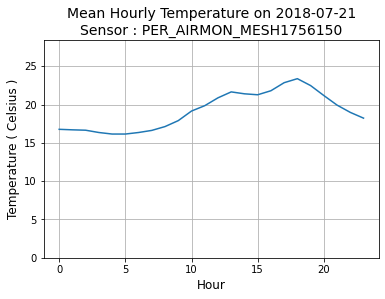

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Read in a csv file to a pandaas dataframe
inFName = "https://raw.githubusercontent.com/kirenrajb/Dataset/main/sensors_NCL_UO_01%20(2).csv"
rawDf = pd.read_csv( inFName)

# 2.) Adjust the column labels to be more concise, some tools struggle with spaces in column names.
# 3.) Split the date into date and hour columns, note this needs to use datetime, we will come back to datetime representations in pandas soon.
filtDf = pd.DataFrame()
filtDf["sensorName"] = rawDf["Sensor Name"]  
filtDf["variable"] = rawDf["Variable"]  
filtDf["value"] = rawDf["Value"]  
filtDf["units"] = rawDf["Units"]
filtDf["groundHeight"] = rawDf["Ground Height Above Sea Level"]  
filtDf["plusHeight"] = rawDf["Sensor Height Above Ground"]  
filtDf["lat"] = rawDf["Sensor Centroid Latitude"] 
filtDf["lon"] = rawDf["Sensor Centroid Longitude"]  
filtDf["datetime"] = pd.to_datetime( rawDf.Timestamp )
filtDf['date'] = filtDf['datetime'].dt.date
filtDf['date'] = pd.to_datetime( filtDf.date )
filtDf['hour'] = filtDf['datetime'].dt.hour

# 4.) sate the wrangled file out to new csv file, wihtout saving the (often redundant) index column
outFName = "wrangled_NCL_UO_01.csv"
filtDf.to_csv( outFName, index = False)

# Read in the wrangled sensor data, get a list of the unique sensor names, filter from the data so it only includes data from the first sensor in the list.
inFName = "wrangled_NCL_UO_01.csv"
wrangledDf = pd.read_csv(inFName)
sensorList = wrangledDf.sensorName.unique()
filtDf = wrangledDf[wrangledDf.sensorName == sensorList[0]]
# Use groupby to aggregate data - in the case that we are asking for the mean temperature to be calculated for each hour of the day. (In the previous wrangling code 
# we extracted the hour for every row in the file)
# Note: groupby will take the mean for all numeric values, and remove non-numeric columns from its output
sensorDf = filtDf.groupby(filtDf.hour, as_index = False).mean()
hours = sensorDf["hour"]
temperatures = sensorDf["value"]
aTitle = "Mean Hourly Temperature on " + \
          filtDf.date[0] + \
          "\nSensor : " + filtDf.sensorName[0]

# Now we can get lists of the hours of the day and mean temperatures for each hour of the day, ready to plot using the matplotlib calls shown.
plt.plot(hours, temperatures)
plt.ylim([0.0, temperatures.max() + 5])
plt.title(aTitle, fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel("Temperature ( " + filtDf.units[0] + " )", fontsize = 12)
plt.grid(True)
plt.show()


# Section 3

In [ ]:
# THE DATETIME MODULE
# The datetime module handles both dates and times in an object oriented way. 
# - The code in next slide illustrates getting the time for now from the module and then 
# printing it out or printing out sub-components. 
# - Notice that the time is measured to millionths of a second and you can use it to time the 
# real time compute time for longer running pieces of code. 
# - The components of a date time object can be accessed individually as shown. 
# - Note that: Weekday is a numeric code for day of the week. 

from datetime import datetime
import pandas as pd
rightNow = datetime.now()

# Components of datetime
print( rightNow ) #
print( rightNow.year ) 
print( rightNow.month ) 
print( rightNow.day )
print( rightNow.weekday() ) 
print( rightNow.hour ) 
print( rightNow.minute ) 
print( rightNow.second )
print()
# When dates are read from a csv file may be stored as text strings, sometimes as numbers. 
# Converting to datetime objects allows sorting and arithmetic to work correctly

# WRITING DATES TO CSV FILES
# - When working with pandas dataframes it is common to store them in text formats such as csv files. 
# - Here we create a dataframe from two lists, one of date values and one of numeric values. 
# - Because the dates are object we can do arithmetic on them to find, for example, how many days they are apart. 
# - We then save the dataframe to a csv file, at this point the datetime objects are automatically converted to a text representation. 
dateNow = rightNow.date()
dateList = pd.date_range(dateNow, periods = 10).tolist()
valueList = range ( 10 ) # creates a DataFrame from a list of dates and a list of values

df = pd.DataFrame()
df["date"] = dateList
df["value"] = valueList

print(df["date"][5] - df["date"][0]) # Check we can work with the dates as expected

df.to_csv("testData.csv", index = False)

# READING DATES FROM A CSV FILE
# Read in the DataFrame from the csv file we just saved out.
inDf = pd.read_csv("testData.csv") 
# Check we can work with the dates as expected. (This fails)
# print( inDf["date"][0] - inDf["date"][5] )

# Convert the date column to datetime objects.
inDf['date'] = pd.to_datetime(inDf['date'])

print( inDf["date"][0] - inDf["date"][5] )
print()

# FORMATTING DATETIME AS STRINGS
# - The example on next page starts with a date as a string and demonstrates how to use: 
#       .strptime() to convert to a datetime object.
# - Note the format string must match exactly the date strings . 
# - Converting a string to a datetime object can need some care – watch out for date order issues:
#       by default python assumes mm-dd-yyy not the UK dd-mm-yyyy
# - One option is to use YYYY-MM-DD as this tends to be more consistent globally, and is an ISO standard for date formatting. 
print( rightNow )
# Formatted printing : https://docs.python.org/3/library/datetime.html     -- TRY DIFFERENT WAYS OF FORMATTING THE DATETIME VARIABLE
# Many options for converting a datetime value to a string, works for dates and time, see website
dateAsString = rightNow.strftime("%d/%m/%Y")
print( dateAsString )

dateAsString = rightNow.strftime("%A %d %B %Y")
print( dateAsString )
print()

# .strftime( fmtString ) Is a method that takes a formatting string and uses that output the required datetime object in the format given, for example: 
#       %d - is numeric day of the month.       %A – is text for the day of the week Monday to Sunday. 

#CONVERTING STRINGS TO DATETIME
dateString = "05/07/2021"

dateObject = datetime.strptime(dateString, "%d/%m/%Y")
print(dateObject)

dateString = "05/07/2021 12:31:00"
dateObject = datetime.strptime(dateString, "%d/%m/%Y %H:%M:%S")
# NB format needs to match exactly
print( dateObject )

# Converting a string to a datetime object can need some care – watch out for date order issues.
# One default is to be in the habit of using %Y-%m-%d as this tends to be more consistent globally






2022-11-13 05:10:43.077421
2022
11
13
6
5
10
43

5 days 00:00:00
-5 days +00:00:00

2022-11-13 05:10:43.077421
13/11/2022
Sunday 13 November 2022

2021-07-05 00:00:00
2021-07-05 12:31:00
